In [1]:
"""
Starting with a given image, try to create one good for a word cloud
"""

'\nStarting with a given image, try to create one good for a word cloud\n'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from PIL import Image, ImageOps, ImageEnhance
import cv2
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [3]:
def pillow_pipeline(image_path):
    w=10
    h=10
    fig=plt.figure(figsize=(8, 8))
    columns = 4
    rows = 1
    orig_image = Image.open(image_path)
    width, height = orig_image.size
    if width > height:
        orig_image = orig_image.rotate(-90)
    print("pillow original:")
    fig.add_subplot(1, 4, 1)
    plt.imshow(orig_image)
    grayscale_image = orig_image.convert('L')
    print("grayscale:")
    fig.add_subplot(1, 4, 2)
    plt.imshow(grayscale_image)
    enhancer = ImageEnhance.Contrast(grayscale_image)
    cont_image = enhancer.enhance(2.0)
    print("enhanced grayscale:")
    fig.add_subplot(1, 4, 3)
    plt.imshow(cont_image)
    print("thresholded:")
    threshold = 128
    cont_bw_image = cont_image.point(lambda p: p > threshold and 255)
    fig.add_subplot(1, 4, 4)
    plt.imshow(cont_bw_image)
    plt.show()
    return cont_bw_image

pillow original:
grayscale:
enhanced grayscale:
thresholded:


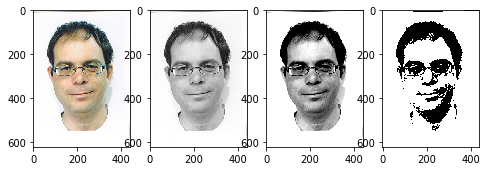

In [4]:
image_path = "../data/inputs/images/yuval_passport_sep_2011 - yuval feinstein.jpg"

cont_bw_image = pillow_pipeline(image_path)

pillow original:
grayscale:
enhanced grayscale:
thresholded:


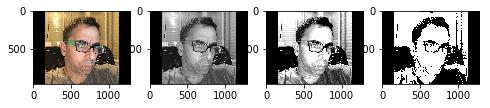

In [5]:
image_path = "../data/inputs/images/image - dori oryan.jpg"
cont_bw_image = pillow_pipeline(image_path)

In [6]:
def opencv_pipeline(image_path):
    w=10
    h=10
    fig=plt.figure(figsize=(8, 8))
    columns = 4
    rows = 1
    orig_image = cv2.imread(image_path)
    height, width = orig_image.shape[:2]
    if width > height:
        orig_image = orig_image.rotate(-90)
    print("cv2 original:")
    fig.add_subplot(1, 4, 1)
    rgb_image = cv2.cvtColor(orig_image, cv2.COLOR_BGR2RGB)
    plt.imshow(rgb_image)
    grayscale_image = cv2.cvtColor(orig_image, cv2.COLOR_BGR2GRAY)
    print("grayscale:")
    fig.add_subplot(1, 4, 2)
    plt.imshow(grayscale_image, "gray")
    
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    cont_image = clahe.apply(grayscale_image)
    #cont_image = cv2.equalizeHist(grayscale_image)
    print("enhanced grayscale:")
    fig.add_subplot(1, 4, 3)
    plt.imshow(cont_image, "gray")
    retval, cont_bw_image = cv2.threshold(cont_image, 128, 255, cv2.THRESH_BINARY)
#     print("thresholded:")
#     threshold = 128
#     cont_bw_image = cont_image.point(lambda p: p > threshold and 255)
    fig.add_subplot(1, 4, 4)
    plt.imshow(cont_bw_image, "gray")
    plt.show()
    return cont_bw_image

cv2 original:
grayscale:
enhanced grayscale:


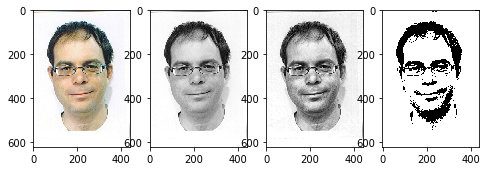

In [7]:
image_path = "../data/inputs/images/yuval_passport_sep_2011 - yuval feinstein.jpg"
#image_path = "../data/inputs/images/image - dori oryan.jpg"
cont_bw_image = opencv_pipeline(image_path)

cv2 original:
grayscale:
enhanced grayscale:


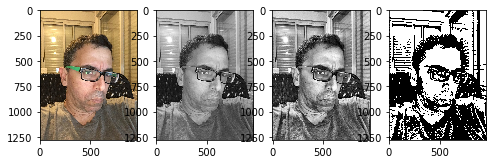

In [8]:
#image_path = "C:/Users/user/Downloads/yuval_passport_sep_2011.jpg"
image_path = "../data/inputs/images/image - dori oryan.jpg"
cont_bw_image = opencv_pipeline(image_path)

In [9]:
def is_english(w):
    if ord(w.lstrip()[0]) < 128:
        return True
    else:
        return False

In [10]:
def black_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%, 0%)"

In [11]:
def remove_html_tags(text):
    """Remove html tags from a string"""
    import re
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

In [18]:
def get_pool_text(cur_id):
    pool_path=''.join(["../data/text_pools/pool", 
                       str(cur_id),
                       ".csv"])
    df = pd.read_csv(pool_path, usecols=["full"]).dropna()
    df.loc[:, "clean"] = df.full.apply(lambda v: remove_html_tags(v))
    df.loc[:, "tokens"] = df.clean.str.split()
    print(df.head())
    text = [item for sublist in df.tokens.tolist() for item in sublist]
    #text = df.tokens.tolist()
    print(text[:10])
    return text

In [12]:
def get_attraction_text():
    csv_path = "C:/Users/dori/artech/artech-2018/data/gov_files/f_07fc9ed5-1ac6-4752-a8c3-90781b3369ad.csv"
    df = pd.read_csv(csv_path, usecols=["FullDescription"]).dropna()
    df.loc[:, "clean"] = df.FullDescription.apply(lambda v: remove_html_tags(v))
    df.loc[:, "tokens"] = df.clean.str.split()
    print(df.head())
    text = [item for sublist in df.tokens.tolist() for item in sublist]
    #text = df.tokens.tolist()
    print(text[:10])
    return text

In [13]:
aa = get_p

                                     FullDescription  \
0  <p style="text-align: right;">מוזיאון ישראל הו...   
1  <p style="text-align: right;">מוזיאון ישראל הו...   
2  <p style="text-align: right;">מוזיאון ישראל הו...   
3  <p style="text-align: right;">מוזיאון ישראל הו...   
4  <p style="text-align: right;">מוזיאון ישראל הו...   

                                               clean  \
0  מוזיאון ישראל הוא מוסד התרבות הגדול ביותר במדי...   
1  מוזיאון ישראל הוא מוסד התרבות הגדול ביותר במדי...   
2  מוזיאון ישראל הוא מוסד התרבות הגדול ביותר במדי...   
3  מוזיאון ישראל הוא מוסד התרבות הגדול ביותר במדי...   
4  מוזיאון ישראל הוא מוסד התרבות הגדול ביותר במדי...   

                                              tokens  
0  [מוזיאון, ישראל, הוא, מוסד, התרבות, הגדול, ביו...  
1  [מוזיאון, ישראל, הוא, מוסד, התרבות, הגדול, ביו...  
2  [מוזיאון, ישראל, הוא, מוסד, התרבות, הגדול, ביו...  
3  [מוזיאון, ישראל, הוא, מוסד, התרבות, הגדול, ביו...  
4  [מוזיאון, ישראל, הוא, מוסד, התרבות, הגדול, ביו..

In [14]:
def invert_hebrew(w):
    if is_english(w):
        return w
    else:
        return w[::-1]

In [15]:
def calc_save_word_cloud(text, mask=None, out_path="../data/outputs/wordcloud_0.jpg"):
    word_list = [invert_hebrew(w) for w in text]
    text = ' '.join(word_list)
    wordcloud = WordCloud(max_words=1000, 
                          background_color="white", 
                          font_path="C:/Windows/Fonts/arial.ttf", 
                          mask=mask).generate(text)
    wordcloud.recolor(color_func = black_color_func)
    print("wordcloud type = ")
    print(type(wordcloud))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    xPix = mask.shape[0]
    yPix = mask.shape[1]

    xSize = 32 #inches
    ySize = xSize/xPix*yPix
    plt.gcf().set_size_inches(xSize,ySize)
    #plt.show()
    plt.savefig(out_path)

In [16]:
def get_cloud_mask(mask_im, dataset_path,out_path):
    #mask_im = get_image(mask_path)
#     print("got image")
#     orig_im = orig_im.crop((500,0, 3500,3024))
#     #imshow(orig_im)
#     print("cropped")
#     print(orig_im.size)
#     mask_im = get_mask(orig_im)
    print("got mask")
    #mask_im = mask_im.rotate(180)
    plt.imshow(mask_im, "gray")
    input_text = get_attraction_text()
    
    calc_save_word_cloud(text=input_text,
                         mask=np.asarray(mask_im),
                        out_path=out_path)
    print("saved cloud")
    #imshow(mask_im)

got mask
                                     FullDescription  \
0  <p style="text-align: right;">מוזיאון ישראל הו...   
1  <p style="text-align: right;">מוזיאון ישראל הו...   
2  <p style="text-align: right;">מוזיאון ישראל הו...   
3  <p style="text-align: right;">מוזיאון ישראל הו...   
4  <p style="text-align: right;">מוזיאון ישראל הו...   

                                               clean  \
0  מוזיאון ישראל הוא מוסד התרבות הגדול ביותר במדי...   
1  מוזיאון ישראל הוא מוסד התרבות הגדול ביותר במדי...   
2  מוזיאון ישראל הוא מוסד התרבות הגדול ביותר במדי...   
3  מוזיאון ישראל הוא מוסד התרבות הגדול ביותר במדי...   
4  מוזיאון ישראל הוא מוסד התרבות הגדול ביותר במדי...   

                                              tokens  
0  [מוזיאון, ישראל, הוא, מוסד, התרבות, הגדול, ביו...  
1  [מוזיאון, ישראל, הוא, מוסד, התרבות, הגדול, ביו...  
2  [מוזיאון, ישראל, הוא, מוסד, התרבות, הגדול, ביו...  
3  [מוזיאון, ישראל, הוא, מוסד, התרבות, הגדול, ביו...  
4  [מוזיאון, ישראל, הוא, מוסד, התרבות, הגד

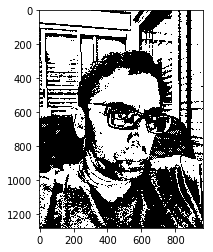

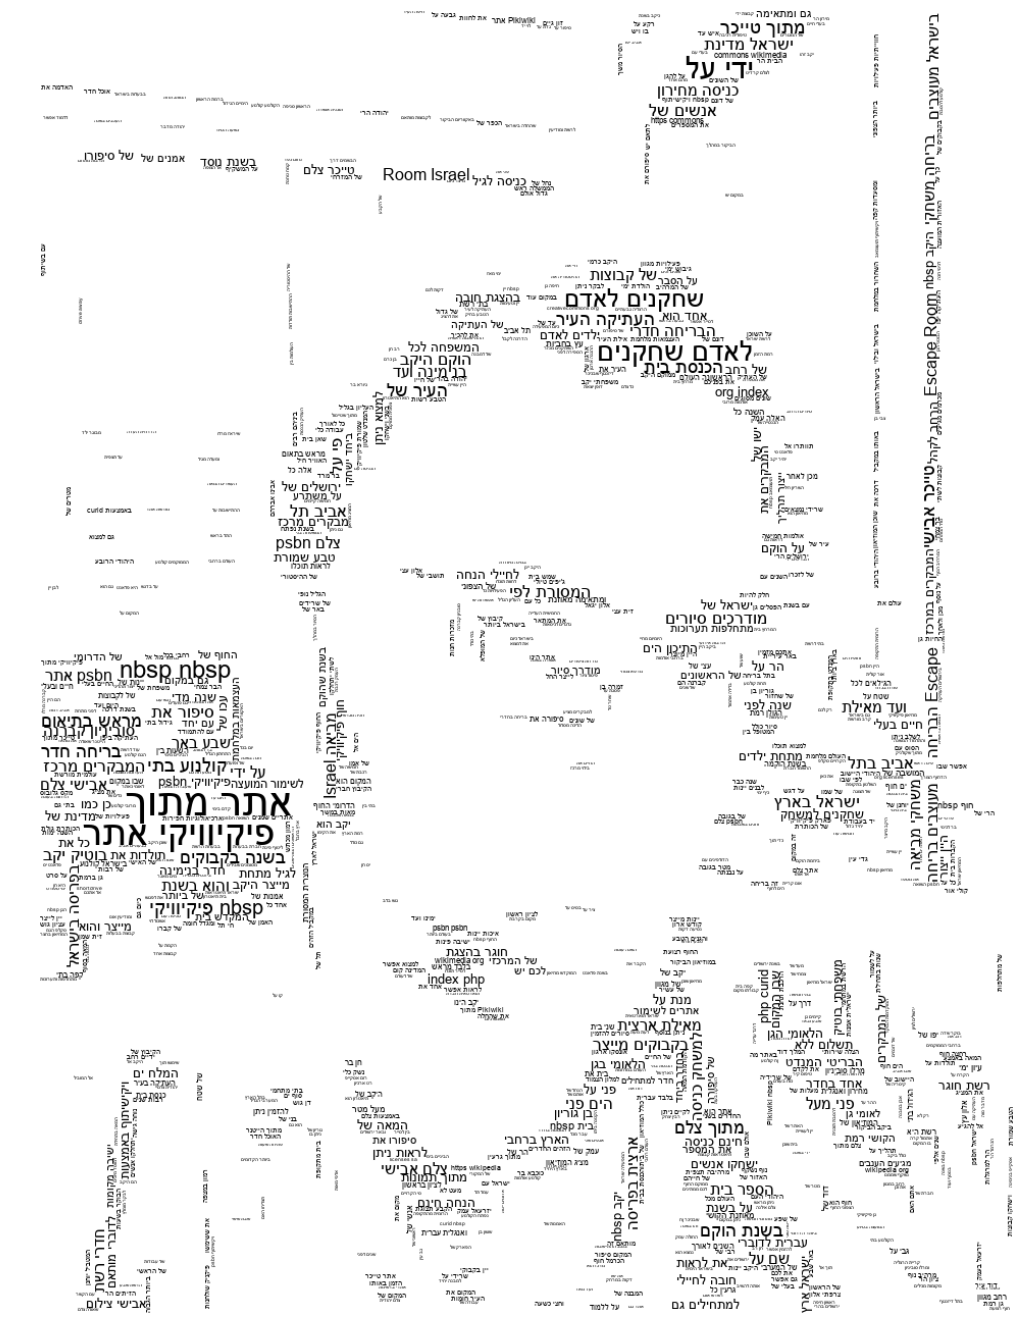

In [17]:
out_path = "../data/outputs/dory_wc.jpg"
get_cloud_mask(cont_bw_image, "", out_path)